<a href="https://colab.research.google.com/github/shashankbhagat/House-Price-Prediction/blob/master/Feature_Engineering_Test_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns',None)

In [19]:
dataset=pd.read_csv('test.csv')
dataset.shape

(1459, 80)

In [20]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Missing Values

**Categorical Features**

In [21]:
## creating a list of features having null values in them for categorical features.
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>0 and dataset[feature].dtypes=='O']

print(len(features_nan))
## Mean percent of feature having null values
for feature in features_nan:
    print(feature,np.round(dataset[feature].isnull().mean(),4),' % missing values')

22
MSZoning 0.0027  % missing values
Alley 0.9267  % missing values
Utilities 0.0014  % missing values
Exterior1st 0.0007  % missing values
Exterior2nd 0.0007  % missing values
MasVnrType 0.011  % missing values
BsmtQual 0.0302  % missing values
BsmtCond 0.0308  % missing values
BsmtExposure 0.0302  % missing values
BsmtFinType1 0.0288  % missing values
BsmtFinType2 0.0288  % missing values
KitchenQual 0.0007  % missing values
Functional 0.0014  % missing values
FireplaceQu 0.5003  % missing values
GarageType 0.0521  % missing values
GarageFinish 0.0535  % missing values
GarageQual 0.0535  % missing values
GarageCond 0.0535  % missing values
PoolQC 0.9979  % missing values
Fence 0.8012  % missing values
MiscFeature 0.965  % missing values
SaleType 0.0007  % missing values


In [22]:
## For simplicity, we would be replacing NaN with Missing keyword

def replace_cat_features(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dataset=replace_cat_features(dataset,features_nan)
dataset[features_nan].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
SaleType        0
dtype: int64

In [23]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal


**Numerical Features**

In [24]:
## Similar implementation for numerical features
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>0 and dataset[feature].dtypes!='O']

for feature in numerical_with_nan:
    print('{}: {}% missing values'.format(feature,np.round(dataset[feature].isnull().mean(),4)))

LotFrontage: 0.1556% missing values
MasVnrArea: 0.0103% missing values
BsmtFinSF1: 0.0007% missing values
BsmtFinSF2: 0.0007% missing values
BsmtUnfSF: 0.0007% missing values
TotalBsmtSF: 0.0007% missing values
BsmtFullBath: 0.0014% missing values
BsmtHalfBath: 0.0014% missing values
GarageYrBlt: 0.0535% missing values
GarageCars: 0.0007% missing values
GarageArea: 0.0007% missing values


For numerical features, we replace the NaN value with the median of that feature. 
Also, while doing this always create a new column, eg: featureName_NaN and have the field with NaN as 1 and rest as 0. This would help us know that this specific feature had NaN values. MORE DATA!!!

In [25]:
for feature in numerical_with_nan:
    ## median, so that there would be no outlier
    feature_median=dataset[feature].median()

    dataset[feature+'_NaN']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(feature_median,inplace=True)

dataset[numerical_with_nan].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [26]:
dataset.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_NaN,MasVnrArea_NaN,BsmtFinSF1_NaN,BsmtFinSF2_NaN,BsmtUnfSF_NaN,TotalBsmtSF_NaN,BsmtFullBath_NaN,BsmtHalfBath_NaN,GarageYrBlt_NaN,GarageCars_NaN,GarageArea_NaN
0,1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
5,1466,60,RL,75.0,10000,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,Missing,Missing,Missing,0,4,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
6,1467,20,RL,67.0,7980,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,Missing,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,Missing,GdPrv,Shed,500,3,2010,WD,Normal,1,0,0,0,0,0,0,0,0,0,0
7,1468,60,RL,63.0,8402,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,Missing,Missing,Missing,0,5,2010,WD,Normal

**Temporal Variables[Datetime, Date, Month, Year, etc]**

In [27]:
[feature for feature in dataset.columns if (('Yr' in feature or 'Year' in feature) and '_NaN' not in feature)]

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [28]:
## Converting the year feature in some sensible number.
## here we would be subtracting them from YrSold feature

for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    dataset[feature]=dataset['YrSold'] - dataset[feature]

dataset[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,49,49,49.0,2010
1,52,52,52.0,2010
2,13,12,13.0,2010
3,12,12,12.0,2010
4,18,18,18.0,2010


**Creating list of numerical features of continuous nature. Then filtering only those features who do not have a 0 in them as we would be perform log normal distribution to convert the non-Guassian disctribution to Guassian distribution. Also, if there is a 0, log(0) is a Math Error.**

In [34]:
[(feature,len(dataset[feature].unique())) for feature in dataset.columns if dataset[feature].dtype!='O' and feature not in ['Yr','Year','Id']]

[('MSSubClass', 16),
 ('LotFrontage', 115),
 ('LotArea', 1106),
 ('OverallQual', 10),
 ('OverallCond', 9),
 ('YearBuilt', 118),
 ('YearRemodAdd', 63),
 ('MasVnrArea', 303),
 ('BsmtFinSF1', 670),
 ('BsmtFinSF2', 161),
 ('BsmtUnfSF', 793),
 ('TotalBsmtSF', 736),
 ('1stFlrSF', 789),
 ('2ndFlrSF', 407),
 ('LowQualFinSF', 15),
 ('GrLivArea', 879),
 ('BsmtFullBath', 4),
 ('BsmtHalfBath', 3),
 ('FullBath', 5),
 ('HalfBath', 3),
 ('BedroomAbvGr', 7),
 ('KitchenAbvGr', 3),
 ('TotRmsAbvGrd', 12),
 ('Fireplaces', 5),
 ('GarageYrBlt', 108),
 ('GarageCars', 6),
 ('GarageArea', 459),
 ('WoodDeckSF', 263),
 ('OpenPorchSF', 203),
 ('EnclosedPorch', 131),
 ('3SsnPorch', 13),
 ('ScreenPorch', 75),
 ('PoolArea', 7),
 ('MiscVal', 26),
 ('MoSold', 12),
 ('YrSold', 5),
 ('LotFrontage_NaN', 2),
 ('MasVnrArea_NaN', 2),
 ('BsmtFinSF1_NaN', 2),
 ('BsmtFinSF2_NaN', 2),
 ('BsmtUnfSF_NaN', 2),
 ('TotalBsmtSF_NaN', 2),
 ('BsmtFullBath_NaN', 2),
 ('BsmtHalfBath_NaN', 2),
 ('GarageYrBlt_NaN', 2),
 ('GarageCars_NaN', 

In [35]:
temp=[feature for feature in dataset.columns if dataset[feature].dtype!='O' and feature not in ['Yr','Year','Id']]
num_features=[]
for feature in temp:
    if len(dataset[feature].unique())>25 and 0 not in dataset[feature].unique():
        num_features.append(feature)
print(num_features)

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']


In [37]:
dataset[num_features].head()

,LotFrontage,LotArea,1stFlrSF,GrLivArea
0,4.382027,9.360655,6.797940,6.797940
1,4.394449,9.565704,7.192182,7.192182
2,4.304065,9.534595,6.833032,7.395722
3,4.356709,9.208138,6.830874,7.380256
4,3.761200,8.518193,7.154615,7.154615


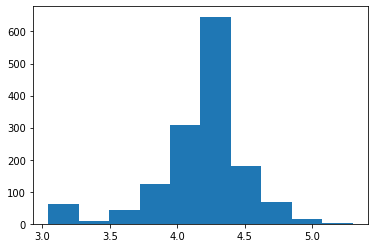

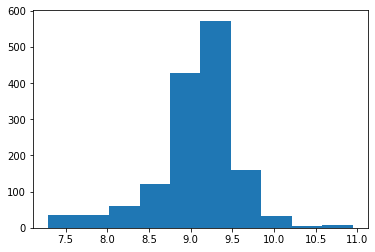

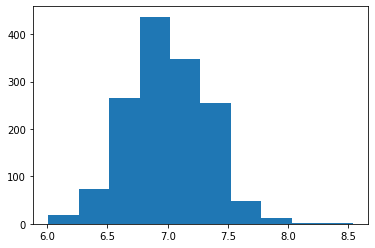

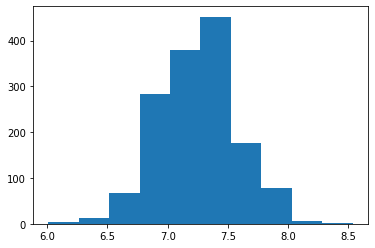

In [39]:
for feature in num_features:
    plt.hist(dataset[feature])
    plt.show()

# Categorical Features

**Label Encoding all Categorical features**

In [40]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

for feature in categorical_features:
    dataset[feature]=encoder.fit_transform(dataset[feature])

dataset[categorical_features].head(50)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,12,1,2,0,2,1,0,11,13,3,3,4,1,4,4,4,5,3,0,4,1,3,4,7,3,1,3,4,5,2,2,3,1,9,4
1,4,1,1,0,3,0,0,0,12,2,2,0,2,3,0,12,14,1,3,4,1,4,4,4,0,6,0,4,1,3,2,7,3,1,3,4,5,2,2,2,0,9,4
2,4,1,1,0,3,0,4,0,8,2,2,0,4,1,0,11,13,3,3,4,2,2,4,4,2,6,0,2,1,3,4,7,5,1,0,4,5,2,2,3,1,9,4
3,4,1,1,0,3,0,4,0,8,2,2,0,4,1,0,11,13,1,3,4,2,4,4,4,2,6,0,0,1,3,2,7,2,1,0,4,5,2,2,2,1,9,4
4,4,1,1,0,1,0,4,0,22,2,2,4,2,1,0,6,6,3,2,4,2,2,4,4,0,6,0,0,1,3,2,7,3,1,2,4,5,2,2,2,1,9,4
5,4,1,1,0,3,0,0,0,8,2,2,0,4,1,0,6,6,3,3,4,2,2,4,4,6,6,0,2,1,3,4,7,5,1,0,4,5,2,2,2,1,9,4
6,4,1,1,0,3,0,4,0,8,2,2,0,2,1,0,6,6,3,3,2,2,2,4,4,0,6,0,0,1,3,4,7,3,1,0,4,5,2,2,0,3,9,4
7,4,1,1,0,3,0,4,0,8,2,2,0,4,1,0,11,13,3,3,4,2,2,4,4,6,6,0,2,1,3,4,7,2,1,0,4,5,2,2,2,1,9,4
8,4,1,1,3,3,0,4,0,8,2,2,0,2,1,0,6,6,3,3,4,2,2,4,1,2,6,0,2,1,3,2,7,4,1,3,4,5,2,2,2,1,9,4
9,4,1,1,3,3,0,0,0,12,2,2,0,2,1,0,9,10,3,3,4,1,4,4,4,0,5,0,4,1,3,4,7,3,1,0,4,5,2,2,3,1,9,4


# Feature Scaling

As all the features are having values ranging within different ranges, we have to bring it to one standard. eg: between 0-1. 
We do not include the Id and the dependent feature columns in this.



In [42]:
## Standard Scaler would convert the data using Standard Normal Distribution.
## MinMax Scaler would convert it between 0-1.

from sklearn.preprocessing import MinMaxScaler
feature_scaling=[feature for feature in dataset.columns if feature not in ['Id']]
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scaling])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [43]:
## Create a new dataset while applying transform of MinMax Scaler.
## Scaler fit returns a multi-dimensional array

data=pd.concat([dataset[['Id']].reset_index(drop=True),pd.DataFrame(scaler.transform(dataset[feature_scaling]),columns=feature_scaling)],axis=1)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_NaN,MasVnrArea_NaN,BsmtFinSF1_NaN,BsmtFinSF2_NaN,BsmtUnfSF_NaN,TotalBsmtSF_NaN,BsmtFullBath_NaN,BsmtHalfBath_NaN,GarageYrBlt_NaN,GarageCars_NaN,GarageArea_NaN
0,1461,0.000000,0.6,0.593445,0.566360,1.0,0.5,1.0,1.000000,0.0,1.0,0.0,0.500000,0.125,0.5,0.0,0.333333,0.444444,0.625,0.384615,0.822581,0.2,0.0,0.846154,0.866667,0.75,0.000000,1.000000,1.0,0.2,1.0,1.0,1.0,0.833333,0.116708,0.5,0.094364,0.126168,0.173111,0.0,1.0,1.0,1.0,0.312253,0.000000,0.0,0.312253,0.0,0.0,0.25,0.0,0.333333,0.5,1.0,0.166667,1.0,0.00,0.6,0.166667,0.792994,1.000000,0.2,0.490591,1.0,1.0,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,1.0,0.75,0.333333,0.000000,0.454545,1.0,1.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1462,0.000000,0.8,0.598957,0.622527,1.0,0.5,0.0,1.000000,0.0,0.0,0.0,0.500000,0.250,0.5,0.0,0.333333,0.555556,0.625,0.407692,0.870968,0.6,0.0,0.923077,0.933333,0.25,0.083721,1.000000,1.0,0.2,1.0,1.0,1.0,0.000000,0.230175,1.0,0.000000,0.189720,0.260844,0.0,1.0,1.0,1.0,0.468253,0.000000,0.0,0.468253,0.0,0.0,0.25,0.5,0.500000,0.5,0.5,0.250000,1.0,0.00,0.6,0.166667,0.802548,1.000000,0.2,0.209677,1.0,1.0,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,1.0,0.50,0.000000,0.735294,0.454545,1.0,1.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1463,0.235294,0.8,0.558854,0.614005,1.0,0.5,0.0,1.000000,0.0,1.0,0.0,0.333333,0.250,0.5,0.0,0.666667,0.444444,0.500,0.107692,0.225806,0.2,0.0,0.846154,0.866667,0.75,0.000000,1.000000,1.0,0.4,0.5,1.0,1.0,0.333333,0.197257,1.0,0.000000,0.064019,0.182139,0.0,0.5,1.0,1.0,0.326139,0.376477,0.0,0.548792,0.0,0.0,0.50,0.5,0.500000,0.5,1.0,0.250000,1.0,0.25,1.0,0.166667,0.678344,0.000000,0.4,0.323925,1.0,1.0,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,1.0,0.75,0.333333,0.000000,0.181818,1.0,1.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1464,0.235294,0.8,0.582212,0.524583,1.0,0.5,0.0,1.000000,0.0,1.0,0.0,0.333333,0.250,0.5,0.0,0.666667,0.555556,0.625,0.100000,0.225806,0.2,0.0,0.846154,0.866667,0.25,0.015504,1.000000,1.0,0.4,1.0,1.0,1.0,0.333333,0.150125,1.0,0.000000,0.151402,0.181747,0.0,0.0,1.0,1.0,0.325285,0.364125,0.0,0.542672,0.0,0.0,0.50,0.5,0.500000,0.5,0.5,0.333333,1.0,0.25,0.4,0.166667,0.675159,0.000000,0.4,0.315860,1.0,1.0,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,1.0,0.50,0.333333,0.000000,0.454545,1.0,1.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1465,0.588235,0.8,0.317987,0.335596,1.0,0.5,0.0,0.333333,0.0,1.0,0.0,0.916667,0.250,0.5,1.0,0.333333,0.777778,0.500,0.146154,0.322581,0.2,0.0,0.461538,0.400000,0.75,0.000000,0.666667,1.0,0.4,0.5,1.0,1.0,0.000000,0.065586,1.0,0.000000,0.475234,0.251227,0.0,0.0,1.0,1.0,0.453388,0.000000,0.0,0.453388,0.0,0.0,0.50,0.0,0.333333,0.5,0.5,0.166667,1.0,0.00,0.6,0.166667,0.694268,0.666667,0.4,0.340054,1.0,1.0,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,1.0,0.50,0.333333,0.000000,0.000000,1.0,1.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
data.to_csv('testX.csv',index=False)